In [1]:
# Importing libraries
from sys import platform
import sys
# To import files from directories
import os; from os import listdir; from os.path import isfile, join
# Image reader
from skimage import io ; from skimage.io import imread
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
import matplotlib.path as mpltPath
# To manipulate arrays
import numpy as np 
import random
import re
import math
from tqdm.notebook import tqdm
import scipy
import pandas as pd
import pathlib
from skimage.exposure import rescale_intensity
# importing cellpose
from cellpose import models, io
from skimage.measure import find_contours
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Figure style and size
from matplotlib import gridspec
mpl.rc('figure',  figsize=(7, 7)); mpl.rc('image', cmap='gray'); mpl.rc('axes', grid=False); mpl.rcParams['figure.dpi'] = 300
%matplotlib inline 

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

# FISH data. From Dr. Linda Forero.

In [3]:
# Deffining the images path 

# Deffining directories
current_dir = pathlib.Path().absolute()
#sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'EmptyFISH','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210331', 'GAPDH_Introns-cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210331', 'GAPDH-Exons-cy3-ETOH','merged')
video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210511','smFISH','GAPDH-Exon-cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210511','smFISH','GAPDH-Exon-cy5','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210518','MS2-Cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210518','MS2-Cy5','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'FISH_ONeil' )

# optional section of code to merge images in case they are not merged in a single file
merge_images =0
if merge_images ==1:
    list_file_names, list_merged_images, number_images = rsp.MergeChannels(video_dir, substring_to_detect_in_file_name = '.*_C0.tif', save_figure =1).merge()

In [4]:
# directly reading figures in folder
list_images, path_files, list_file_names, number_images = rsp.ReadImages(video_dir).read()
#list_file_names

In [5]:
# Preprossesing

remove_outliers = False
rescale_video = False

# Remove outliers from the image
if remove_outliers == True:
    list_images = [rsp.RemoveExtrema(list_images[f],min_percentile=0.1,max_percentile=99.9).remove_outliers() for f,_ in enumerate(list_images) ]

# Rescaling images
if rescale_video == True:
    list_images_rescaled = []
    number_channels = list_images[0].shape[-1]
    number_z_slices = list_images[0].shape[0]
    for i in range (0,number_images ):
        temp_img = np.zeros_like(list_images[0])
        for j in range(0,number_channels):
            temp_img[:,:,:,j] =  np.asarray( [ rescale_intensity(list_images[i][z,:,:,j], in_range='image', out_range='dtype')  for z in range (0, number_z_slices)]  )
        list_images_rescaled.append(temp_img)
    list_images = list_images_rescaled


In [6]:
# Filters
list_images_bp_filtered = [rsp.BandpassFilter(list_images[f],low_pass=1, high_pass=20).apply_filter() for f,_ in enumerate(list_images) ] # Bandpass filter
list_images_gaussian_filtered = [rsp.GaussianFilter(list_images[f],sigma=1).apply_filter() for f,_ in enumerate(list_images) ] # Gaussian filter
#list_images_filtered = [rsn.GaussianLaplaceFilter(list_images_rescaled[f],sigma=1).apply_filter() for f,_ in enumerate(list_images_rescaled) ]
#list_images_filtered = [rsn.GaussianFilter(list_images_filtered[f],sigma=1).apply_filter() for f,_ in enumerate(list_images_filtered) ]

In [7]:
# Cell visualization 3D. To start visualization simply move the time slider.
#n_img =0
#controls, output = rsp.VisualizerVideo3D(list_images[n_img]).make_video_app()
#display(VBox([controls, output])); plt.rcParams['figure.figsize'] = [15, 15]

NameError: name 'list_images_rescaled' is not defined

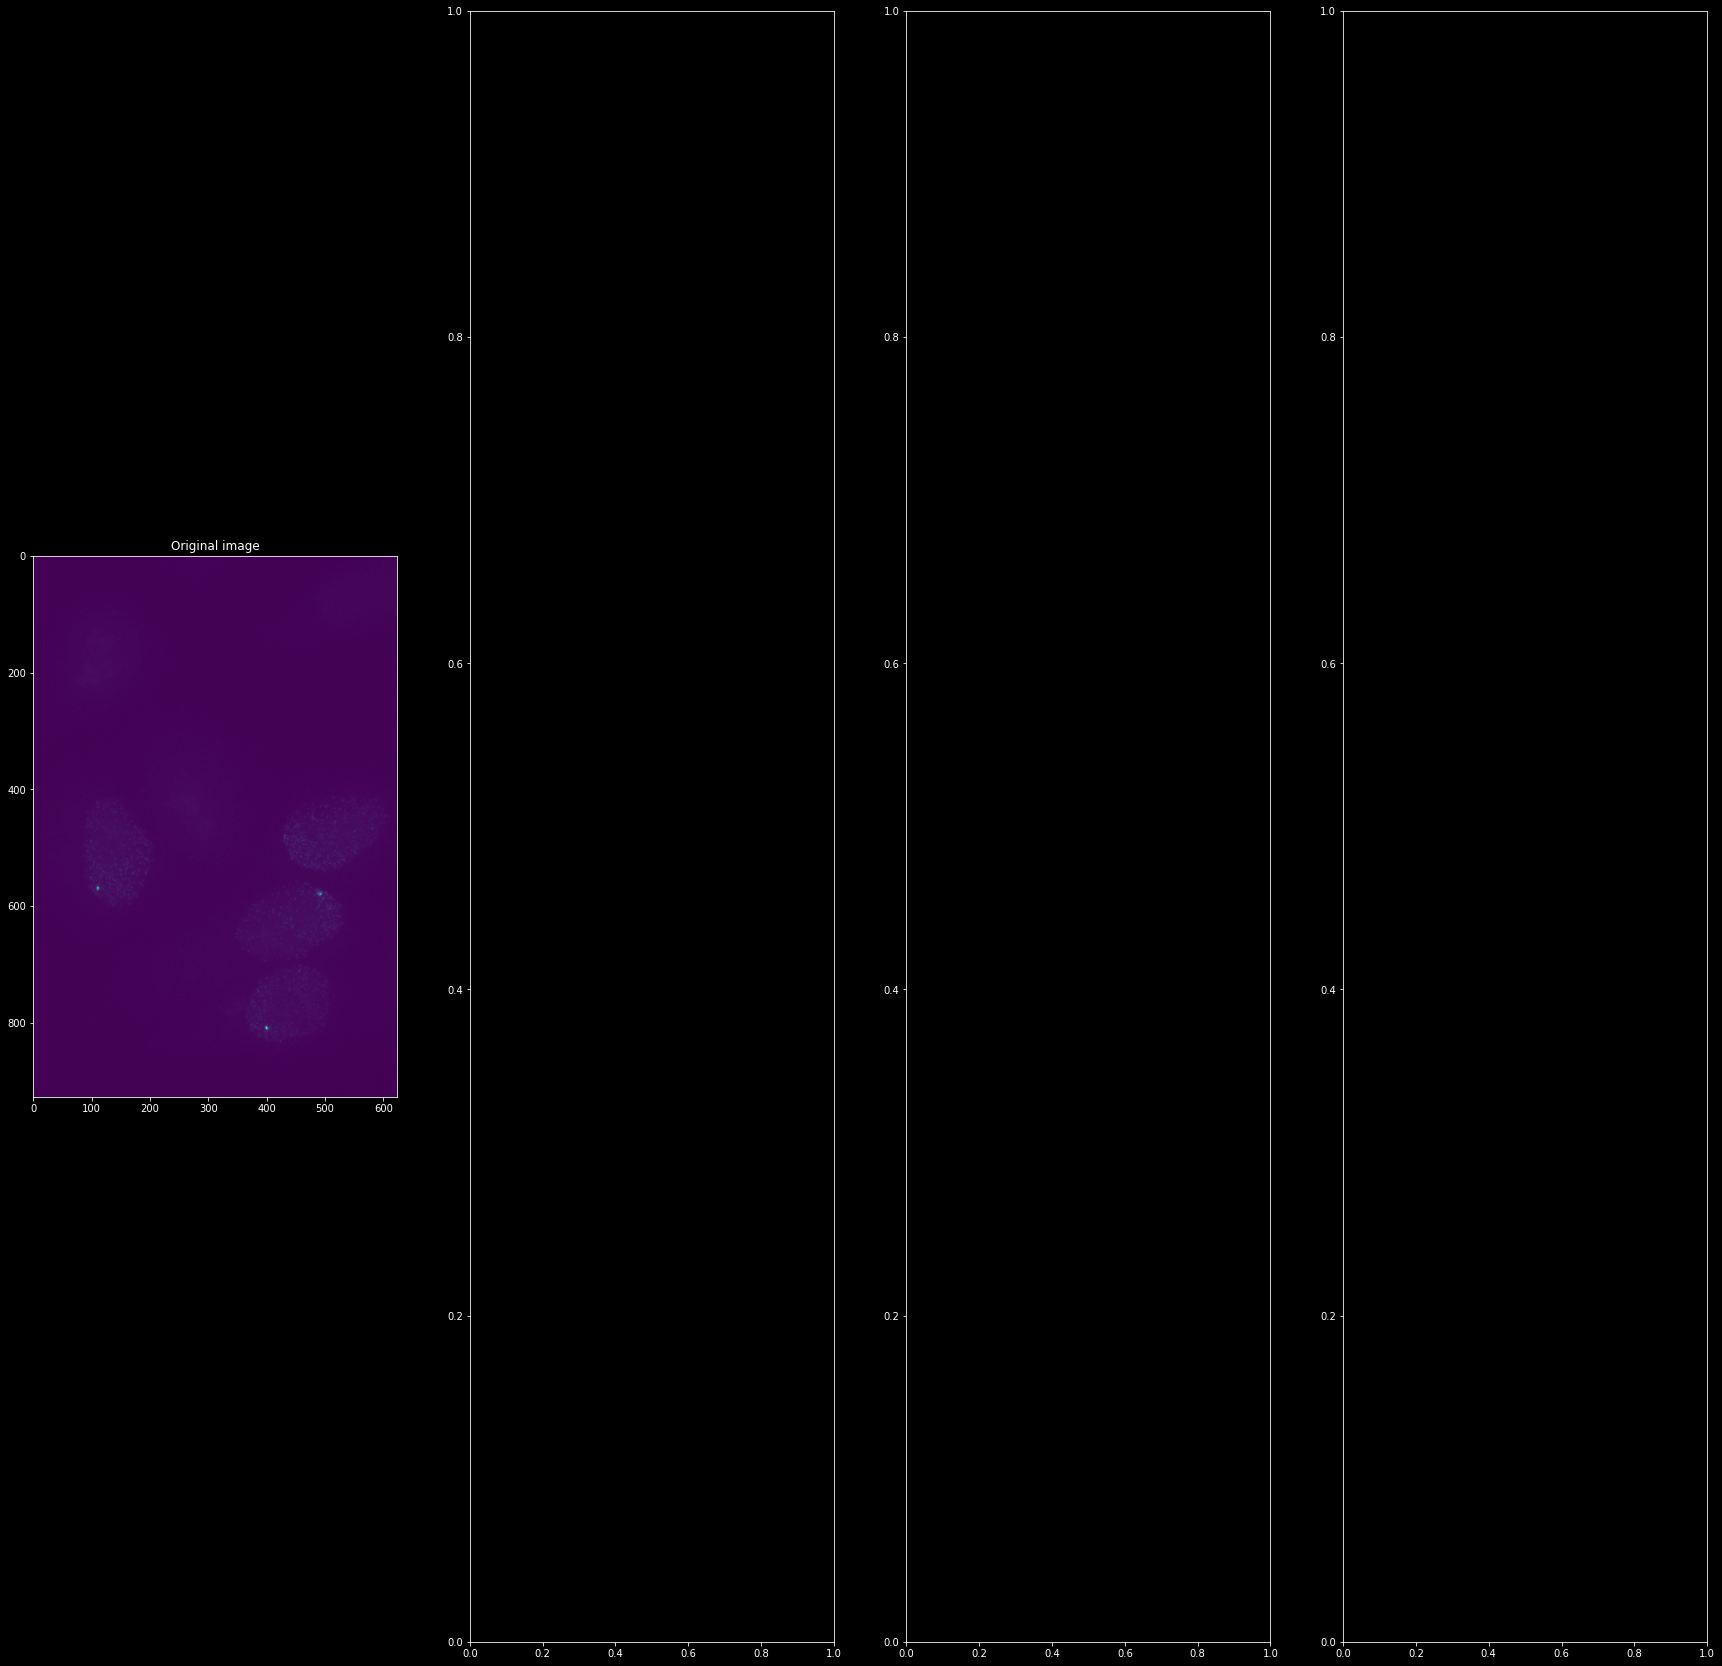

In [8]:
selected_channel = 1
for i in range (0,number_images ):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 30))
    axes[0].imshow(np.max(list_images[i][:,:,:,selected_channel],axis=0),cmap='viridis') 
    axes[0].set_title('Original image')
    axes[1].imshow(np.max(list_images_rescaled[i][:,:,:,selected_channel],axis=0),cmap='viridis') 
    axes[1].set_title('Rescaled image')
    axes[2].imshow(np.max(list_images_bp_filtered[i][:,:,:,selected_channel],axis=0),cmap='viridis')
    axes[2].set_title('Bandpass')
    axes[3].imshow(np.max(list_images_gaussian_filtered[i][:,:,:,selected_channel],axis=0),cmap='viridis')
    axes[3].set_title('Gaussian')
    plt.show()

In [ ]:
#number_channels = list_images[0].shape[-1]
#for i in range (0,1):#number_images ):
#    fig, axes = plt.subplots(nrows=1, ncols=number_channels, figsize=(30, 30))
#    for j in range(0,number_channels):
#        axes[j].imshow(np.max(list_images_filtered[i][:,:,:,j],axis=0),cmap='viridis')   
#    plt.show()

# <span style= "color:red"> Cell segmentation </span>

## Cell segmentaion using machine learning.
<span style="font-size:1em;"> CNN architecture based on U-Net. <span/>
<span style="font-size:1em;"> Cellpose by Dr. Carsen Stringer (Janelia). <span/>

In [ ]:
list_masks_complete_cells =[]
list_masks_nuclei =[]
list_masks_cytosol_no_nuclei =[]
list_index_paired_masks =[]
for i in range(0, number_images):
    #masks_complete_cells,masks_nuclei,masks_cytosol_no_nuclei, index_paired_masks = rsp.CellposeFISH(list_images[i],channel_with_cytosol=2, channel_with_nucleus=0,diameter_cytosol =200, diamter_nucleus=150, show_plot=1).calculate_masks() # Lindas cells
    masks_complete_cells,masks_nuclei,masks_cytosol_no_nuclei, index_paired_masks = rsp.CellposeFISH(list_images[i],channel_with_cytosol=None, channel_with_nucleus=0,diameter_cytosol =200, diamter_nucleus=100, show_plot=1).calculate_masks()  # Detect only nucleus
    #masks_complete_cells,masks_nuclei,masks_cytosol_no_nuclei, index_paired_masks = rsp.CellposeFISH(list_images[i],channel_with_cytosol=0, channel_with_nucleus=1,diameter_cytosol =250, diamter_nucleus=100, show_plot=1).calculate_masks()  # ONeil conditions
    list_masks_complete_cells.append(masks_complete_cells)
    list_masks_nuclei.append(masks_nuclei)
    list_masks_cytosol_no_nuclei.append(masks_cytosol_no_nuclei)
    list_index_paired_masks.append(index_paired_masks)

## Example: visualizing all generated masks for a given image

In [ ]:
if False:
    selected_image = 9
    num_cells_in_image = list_index_paired_masks[selected_image].shape[0]
    for i in range(0,num_cells_in_image):
        print('')
        print('Masks for image: File_Number_'+ str(selected_image) + ' Cell: ' + str(i) )
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, num_cells_in_image*5))
        axes[0].imshow(list_masks_complete_cells[selected_image][i])# mask cytosol
        axes[0].set(title='Cell_'+str(i)+'_mask_cytosol')
        axes[1].imshow(list_masks_nuclei[selected_image][i])# mask nucleus
        axes[1].set(title='Cell_'+str(i)+'_mask_nucleus')
        axes[2].imshow(list_masks_cytosol_no_nuclei[selected_image][i])# mask cytosol no nucleus
        axes[2].set(title='Cell_'+str(i)+'cyto_no_nuc')
        plt.show()

# <span style= "color:red"> Tracking </span>

Channel 0 is mRNA, Channel 1 is FLAG tag (labels both nascent and mature proteins), and Channel 2 is GFP (labels only mature protein).

In this excersice I will calculate number and their intensity of spots in the nucleus for channel 1 (FLAG)

In [ ]:
particle_size = 5
selected_channel = 1  #mRNA
minimal_occurence_in_z_axis =  2 # minimal number of frames to consider a trajectory

In [ ]:
# Function that accepts a list of images in 3d, calculates a 3D tracking and returns a list of list containing the trajectories for each cell in each image
def compute_tracking_3D (list_images,list_maks, minimal_occurence_in_z_axis =3, particle_size=5,selected_channel=0):
    number_images = len(list_images)
    list_complete_DF= []
    list_complete_num_spots_per_cell = []
    list_complete_videos_filtered = []
    # nested loops that calculate the 3D tracking
    for i in tqdm(range(0,number_images)): 
        list_Dataframe_trajectories= []
        list_num_spots_per_cell = []
        list_videos_filtered = []
        max_num_cells = list_maks[i].shape[0]
        for cell in range (0,max_num_cells):
            Dataframe_trajectories, number_detected_trajectories, filtered_video = rsp.Trackpy(list_images[i],list_maks[i][cell],particle_size=particle_size, selected_channel=selected_channel,minimal_frames=minimal_occurence_in_z_axis,optimization_iterations = 30, show_plot =1,FISH_image=1).perform_tracking()   
            list_Dataframe_trajectories.append(Dataframe_trajectories)
            list_num_spots_per_cell.append(number_detected_trajectories)
            list_videos_filtered.append(filtered_video)
        #Appending list of lists
        list_complete_DF.append(list_Dataframe_trajectories)
        list_complete_num_spots_per_cell.append(list_num_spots_per_cell)
        list_complete_videos_filtered.append(list_videos_filtered)
    return list_complete_DF, list_complete_num_spots_per_cell, list_complete_videos_filtered # each list contains the data for each cell in each image. list = [image_0,image_1,image_N] and inside each image a sublist in the form: image_0 = [cell_0, cell_1, cell_N]

In [ ]:
# This section computer the tracking 
#list_complete_DF, list_complete_num_spots_per_cell, list_complete_videos_filtered = compute_tracking_3D (list_images,list_masks_complete_cells, minimal_occurence_in_z_axis =minimal_occurence_in_z_axis, particle_size=particle_size,selected_channel=selected_channel)
list_complete_DF, list_complete_num_spots_per_cell, list_complete_videos_filtered = compute_tracking_3D (list_images,list_masks_nuclei, minimal_occurence_in_z_axis =minimal_occurence_in_z_axis, particle_size=particle_size,selected_channel=selected_channel)



In [ ]:
#for idx in tqdm(range(0,number_images)):
#    max_num_cells = list_index_paired_masks[idx].shape[0]
#    for cell in range (0,max_num_cells):
#        file_name = 'Image_'+str(idx)+'_Cell'+str(cell)+'.tif' # Creating a file name
#        rsp.VisualizerImage(list_images[idx],list_videos_filtered=list_complete_videos_filtered[idx][cell],list_selected_particles_dataframe=list_complete_DF[idx][cell],list_files_names=file_name,list_mask_array = list_masks_complete_cells[idx][cell],selected_channel=selected_channel,selected_timepoint=0,normalize=False,individual_figure_size=5).plot()

# <span style= "color:red"> Intensity </span>

In [ ]:
# Function that accepts a list of images in 3d, calculates a 3D tracking and returns a list of list containing the trajectories for each cell in each image
def compute_intensity_3D (list_images,list_complete_DF, list_index_paired_masks,particle_size=5):
    number_images = len(list_images)
    list_complete_array_intensities= []
    list_complete_DF_intensity=[]
    # nested loops that calculate the 3D tracking
    for i in tqdm(range(0,number_images)): 
        list_array_intensities= []
        list_DF =[]
        max_num_cells = len(list_index_paired_masks[i])
        for cell in range (0,max_num_cells):
            DataFrame_particles_intensities, array_intensities, _, _,_, _, _ = rsp.Intensity(list_images[i][cell],particle_size,list_complete_DF[i][cell],method='disk_donut',show_plot=0).calculate_intensity()           
            list_array_intensities.append(array_intensities)
            list_DF.append(DataFrame_particles_intensities)
        #Appending list of lists
        list_complete_array_intensities.append(list_array_intensities)
        list_complete_DF_intensity.append(list_DF)
    return list_complete_array_intensities,list_complete_DF_intensity # each list contains the data for each cell in each image. list = [image_0,image_1,image_N] and inside each image a sublist in the form: image_0 = [cell_0, cell_1, cell_N]

In [ ]:
list_complete_array_intensities,list_complete_DF_intensity = compute_intensity_3D (list_complete_videos_filtered,list_complete_DF, list_index_paired_masks,particle_size=5)

## Example showing an intensity data frame

In [ ]:
#list_complete_DF_intensity[9][2]

## Plotting intensities per cell in cytosol and nucleus

In [ ]:
list_complete_int =[]
for i in range(0,number_images):
    list_int =[]
    max_num_cells = len(list_index_paired_masks[i])
    for cell in range (0,max_num_cells):
        df = list_complete_DF_intensity[i][cell]
        n_particles = df['particle'].nunique()
        intensity_values_in_image = np.zeros((n_particles))
        for j in range (0,n_particles):
            intensity_values_in_image[j] = np.amax(df[df['particle'] ==j].green_int_mean.values)         
        list_int.append(intensity_values_in_image)
    list_complete_int.append(list_int)

In [ ]:
NUM_COLUMNS = 8
individual_figure_size = 2

total_number_cells =0
for i in range(0,number_images):
    max_num_cells = len(list_index_paired_masks[i])
    total_number_cells+=max_num_cells
total_number_cells


NUM_ROWS = int(math.ceil(total_number_cells / NUM_COLUMNS))
# Loop to plot multiple cells in a grid
gs = gridspec.GridSpec(NUM_ROWS, NUM_COLUMNS)
gs.update(wspace = 0.5, hspace = 0.5) # set the spacing between axes.
fig = plt.figure(figsize = (individual_figure_size*NUM_COLUMNS, individual_figure_size*NUM_ROWS))
counter =0
for i in range(0,number_images):
    max_num_cells = len(list_index_paired_masks[i])
    for cell in range (0,max_num_cells):
        if list_complete_int[i][cell].size >0:
            ax = fig.add_subplot(gs[counter])
            ax.hist(list_complete_int[i][cell], alpha=0.95,bins=20,density=True, stacked=True, color=(random.random(),random.random(),random.random()) )
            ax.set(title =  'Capture_' + str(i) +' Cell_'+str(cell))
            counter +=1
plt.show()



In [ ]:
# Plotting distribution for all cells
plt.figure(figsize=(4,4))
selected_image =1
all_cell_int = [item for sublist in list_complete_int[selected_image] for item in sublist]
np_all_cell_int = np.asarray(all_cell_int)
plt.hist(np_all_cell_int[np_all_cell_int>0], alpha=0.95,bins=30,density=True, stacked=True, color=(random.random(),random.random(),random.random()) )
plt.title('all cells int')
plt.tight_layout()
plt.show()